## 1. 단순선형회귀를 이용한 다이아몬드 가격 예측

복습과제 데이터셋에 포함된 `'diamonds.csv'` 파일을 이용하여 코드를 작성합니다.

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

(1) 먼저, 'diamond_data'로 `diamonds.csv`를 불러오세요. 
그 뒤 데이터프레임의 크기(행과 열의 개수)와 컬럼별로 Null값이 아닌 열의 개수를 출력하세요.

In [2]:
diamond_data = pd.read_csv('diamonds.csv')

In [3]:
diamond_data.shape

(53940, 11)

In [4]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(2) 결측치 처리

- 먼저 데이터프레임의 가장 앞에 있는 `Unnamed : 0` 열을 지워주세요.
- 데이터 프레임의 `x, y, z`에 0이 있는지 행의 개수를 확인하고, 있다면 0은 np.NaN으로 바꿔주세요
- 그 후 `dropna()` 메서드를 활용하여 데이터프레임 전체의 결측치를 삭제 해주세요.

In [5]:
diamond_data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diamond_data['x'][diamond_data['x'] == 0]

11182    0.0
11963    0.0
15951    0.0
24520    0.0
26243    0.0
27429    0.0
49556    0.0
49557    0.0
Name: x, dtype: float64

In [8]:
diamond_data['x'].replace(0,np.NaN, inplace=True)

In [9]:
diamond_data['x'].isnull().sum()

8

In [10]:
diamond_data['y'].replace(0,np.NaN, inplace=True)
diamond_data['z'].replace(0,np.NaN, inplace=True)

In [11]:
diamond_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

- 결측치가 다 지워졌는지 확인하기 위해 결과값을 출력해주세요 (`isnull().sum()` 이용)

In [12]:
diamond_data.dropna(axis=0, inplace=True)
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

(3) 데이터 전처리
- `x, y, z` 열 값을 곱한 결과를 `volume`이라는 새로운 열로 저장해주세요.
- 그 뒤 기존의 `x, y, z`열은 삭제해주세요.

In [13]:
diamond_data['volume'] = diamond_data['x'] * diamond_data['y'] * diamond_data['z']

In [14]:
diamond_data['volume']

0         38.202030
1         34.505856
2         38.076885
3         46.724580
4         51.917250
            ...    
53935    115.920000
53936    118.110175
53937    114.449728
53938    140.766120
53939    124.568444
Name: volume, Length: 53920, dtype: float64

In [15]:
diamond_data.drop(['x','y','z'],axis=1, inplace=True)

In [16]:
diamond_data

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


(4) 이상치(Outlier) 분석

- 박스 플롯을 통해 피처별 값의 분포를 확인해주세요.

{'whiskers': [<matplotlib.lines.Line2D at 0x25a3347db50>,
 'caps': [<matplotlib.lines.Line2D at 0x25a3348c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a3347d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a3348c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a3348cc70>],
 'means': []}

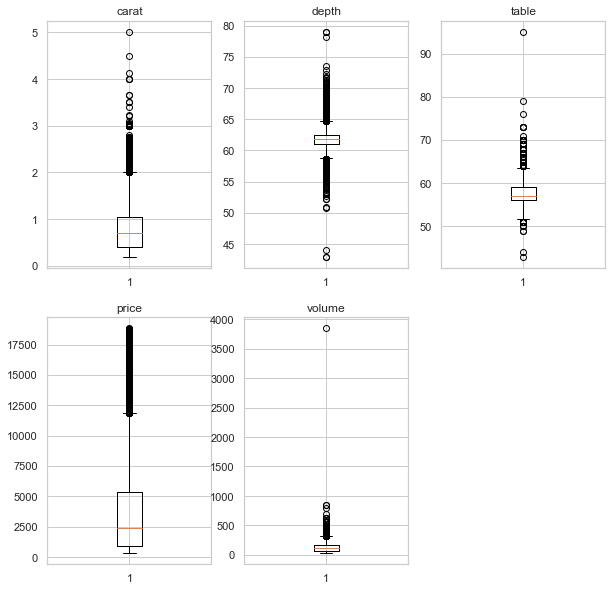

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.title('carat')
plt.boxplot(diamond_data['carat'])
plt.subplot(232)
plt.title('depth')
plt.boxplot(diamond_data['depth'])
plt.subplot(233)
plt.title('table')
plt.boxplot(diamond_data['table'])
plt.subplot(234)
plt.title('price')
plt.boxplot(diamond_data['price'])
plt.subplot(235)
plt.title('volume')
plt.boxplot(diamond_data['volume'])

- 이제, 아래에 주어진 **이상치 제거 함수**를 활용하여, 
데이터 프레임에서 **객체(object)**타입이 **아닌** 열에 대해 이상치 제거 함수를 적용해주세요.

*아래의 이상치 제거 함수는 정해진 구간 밖의 데이터는 NaN값으로 바꿔주는 함수입니다.*

- 이상치 제거 함수를 적용한 후에 이상치에서 전환된 결측치들을 **평균값**으로 채워주세요.

힌트 : for문과 `select_dtypes(exclude='object')` 메서드를 활용하면 일일이 열을 지정하지 않고 한 번에 코드를 돌릴 수 있습니다.

In [18]:
### 이상치 제거 함수
def outliers(var):
    a = []
    q1 = diamond_data[var].quantile(.25)
    q2 = diamond_data[var].quantile(.5)
    q3 = diamond_data[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in diamond_data[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

In [19]:
# 예?

(5) 단순회귀모형 구축 및 평가

- X에는 위에서 계산한 `volume`을, Y에는 `price`열을 저장해주세요.
- 그 뒤 테스트 셋의 크기는 0.3으로 설정하여 학습데이터와 테스트데이터를 분리해주세요. 
(random_state는 자신의 학번으로 설정 ex. 2018XXXXXX => random_state = 18)

- LinearRegression 모듈을 regr으로 불러오고, 모델을 학습시킨 뒤 RMSE값과 R2값을 출력해주세요.

- 마지막으로, 모형이 예측한 결과와 실제값의 분포를 비교해보겠습니다.
- X 전체에 대해 모형이 예측한 결과를 `y_hat`에 저장하고, `y_hat`과 실제값인 `y`의 분포를 한 평면에 나타내어 비교해주세요.
- 그 뒤 모델의 성능을 높이기 위해 고려해야 할 점에 대해 간단히 설명해주세요.
- figsize=(10, 5), hist = False로 설정합니다

**예측값 distplot의 label이 'h_hat'으로 잘못 출력되어있는데, 'y_hat'으로 해주시면 됩니다!**

## 2. 다중회귀를 이용한 Manhattan 주택 가격 예측

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


#### (1) 다음과 동일하게 도식화 하세요.
- 단, **`figsize=(10,9)`** 로 설정

In [21]:
df.drop('rental_id',axis=1, inplace=True)

<AxesSubplot:>

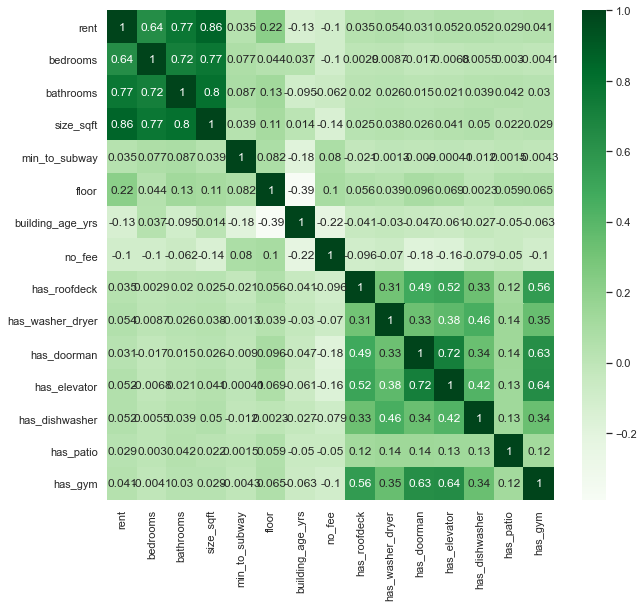

In [22]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot = True, cmap='Greens')

#### (2) df에서  `rental_id`, `rent`, `neighborhood`, `borough`  열을 제외한 모든 열은 독립변수,  `rent` 은 종속변수입니다.
- 독립변수는 **`X`**, 종속변수는 **`y`** 에 저장하세요.
- 단, **`X`** 를 생성할 때 **`iloc`** 이용하고, 올바르게 추출했는지 info 함수 등을 이용해 확인하세요.

In [23]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [24]:
X = df.drop(['rent','neighborhood','borough','rent'], axis=1)

In [25]:
y = df['rent']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          3539 non-null   float64
 1   bathrooms         3539 non-null   int64  
 2   size_sqft         3539 non-null   int64  
 3   min_to_subway     3539 non-null   int64  
 4   floor             3539 non-null   float64
 5   building_age_yrs  3539 non-null   int64  
 6   no_fee            3539 non-null   int64  
 7   has_roofdeck      3539 non-null   int64  
 8   has_washer_dryer  3539 non-null   int64  
 9   has_doorman       3539 non-null   int64  
 10  has_elevator      3539 non-null   int64  
 11  has_dishwasher    3539 non-null   int64  
 12  has_patio         3539 non-null   int64  
 13  has_gym           3539 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 387.2 KB


#### (3) 학습/테스트 데이터를 분리하고 학습해주세요. 그 다음 학습을 마친 모형에 test data를 적용하여 결정계수를 계산하고 출력해주세요.
- **`train_size=0.2`**, **`random_state=100`** 으로 설정해주세요. (결정계수=R-제곱)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.7570938626331457

#### (4) 독립 변수들의 계수와 상수항을 출력해주세요.

In [29]:
print(lr.coef_,'\n',lr.intercept_)

[-301.77690721 1199.40368027    4.87394059  -13.01587285   23.60918929
   -7.24674633 -115.08012416   31.89434731  189.22450275 -170.42077666
  149.88135657 -111.13169414  -91.23246993  -23.08525335] 
 -464.81270130868234


#### (5) 위에 작성한 모델로 이 집 값을 예측해주세요. (단, 아래의 값들을 리스트로 한번에 넣어주세요.)
-  bedrooms=1,	bathrooms=1, size_sqft=620, min_to_subway=16, floor=1, building_age_yrs=98, no_fee=1, as_roofdeck=0, has_washer_dryer=1, has_doorman=0, has_elevator=0, has_dishwasher=1, has_patio=1, has_gym=0

-  *힌트 : this_apartment=[[ ]]*

In [30]:
# ???

In [31]:
this_apartment = pd.DataFrame([[1,1,620,16,1,98,1,0,1,0,0,1,1,0]])
this_apartment.columns = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'as_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']

In [32]:
this_apartment

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,as_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,1,1,620,16,1,98,1,0,1,0,0,1,1,0


In [33]:
lr.predict(this_apartment)

array([2431.61153771])

#### (6) 위의 모델로 test data를 통해 예측한 값을 **`y_predict`** 에 저장하세요. 다음과 동일하게 산점도를 그리고 간략하게 해석하세요.
- **`alpha=0.4`** , **`figsize=(10,8)`** 로 설정

In [34]:
y_predict = lr.predict(X_test)

In [35]:
y_predict.shape

(708,)

In [36]:
y_test.shape

(708,)

Text(0.5, 1.0, 'MULTIPLE LINEAR REGRESSION')

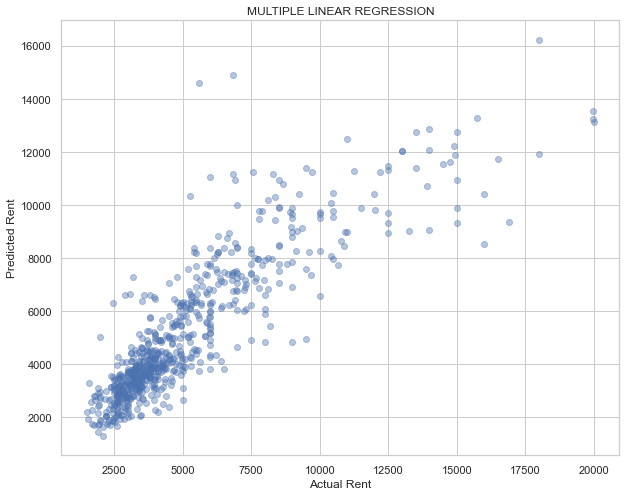

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('MULTIPLE LINEAR REGRESSION')

## 3. 다항회귀분석 실습

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(40,1)**2
y = (10-1./(X.ravel() + 0.1)) + np.random.randn(40)
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

#### 1) 2차항으로 변환시키는 PolynomialFeatures 함수와 LinearRegression 함수로 이루어져있는 Pipeline 객체 model 생성하기 

In [39]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('lr', LinearRegression())])

#### 2) 차수 별 간단한 다항회귀 그래프 그리기 코드를 활용하여, 다음과 같은 그래프 그리기 (차수 = 1, 5, 10)

![nn](./zzzzz.png)

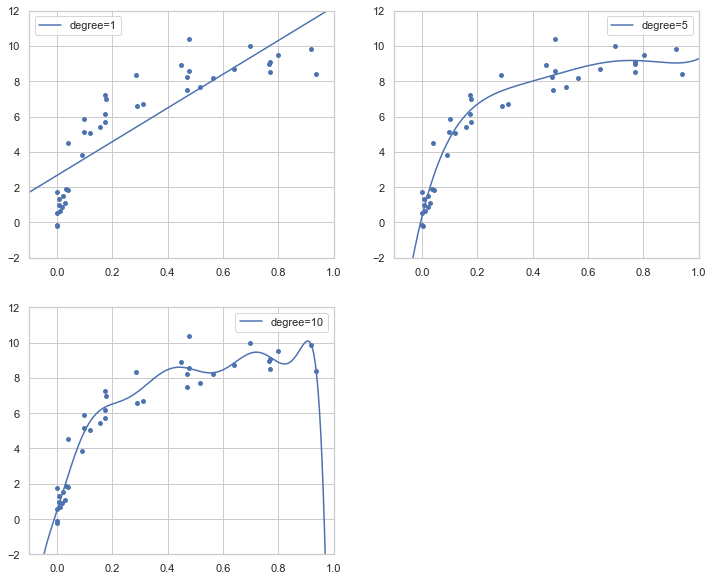

In [40]:
fig = plt.figure(figsize=(12,10))

for i, degree in enumerate([1,5,10], start=1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X,y, s=15)
    y_test = Pipeline([('poly', PolynomialFeatures(degree)),
                      ('linear', LinearRegression())]).fit(X,y).predict(X_test)
    
    ax.plot(X_test,y_test,label='degree={}'.format(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)
    ax.legend(loc='best')

#### 3) 모델들 중 가장 균형 잡힌 모델의 차수를 구하고, 그 외의 모델들의 문제점들을 각각 나열하시오.

5차, 과소적합, 과대적합의 우려가 있음